## Valores atípicos

Un valor atípico (u outlier en inglés) es un punto extremo, o significativamente diferente del resto de los datos. "Un valor atípico es una observación que se desvía tanto de las demás observaciones que hace suponer que estos datos fueron generados con un mecanismo diferente." [D. Hawkins. Identification of Outliers, Chapman and Hall , 1980.]


### Se deben eliminar los valores atípicos?

Dependiendo del contexto, los valores extremos requieren ya sea un tratamiento especial o ser ignorados completamente. Por ejemplo para las predicciones de ingresos: si se observan picos inusuales de ingresos, es probablemente una buena idea prestarles atención y entender las causas de los picos. De la misma forma, una transacción atípica en una tarjeta de crédito, puede ser una señal de actividad fraudulenta, que la entidad crediticia desea prevenir. En estos casos, es una buena idea, mirar e investigar en más detalle los valores atípicos.

Si estos valores extremos, son introducidos por un error mecánico, error en la toma de los datos o alguna otra razón que no puede generalizarse, es una buena idea eliminar estos valores antes de usarlos para entrenar un modelo. Por qué? Porque algunos algoritmos son muy sensibles a estos valores extremos.


### Cuáles modelos de  machine learning susceptibles a los valores atípicos?

Algunos modelos de machine learning son más susceptibles a los valores extremos que otros. 
Por ejemplo, los modelos basados en  árboles de decisión como los Random Forests o los Bosque Aleatorios y las máquinas de potenciación del gradiente, tienden a lidiar mejor con los valores atípicos. 
Los árboles de decisión tienden a ignorar la presencia de valores extremos cuando crean las ramificaciones. Típicamente, un árbol toma decisiones evaluando si una variable es mayor o igual a cierto umbral  (x >= umbral). Un valor extremo simplemente queda en algún lado de la ramificación, por lo tanto será tratado igual que cualquier otro valor, sin importar su magnitud. 
AdaBoost por el contrario, puede poner mayor pesos a los valores atípicos, generando un sobre-ajuste a los dato de entrenamiento, y por lo tanto mala generalización. 

Contrariamente, las regresiones lineales, las regresiones logísticas, y los modelos de aglomeramiento con  k-means son susceptibles a los valores extremos.

Un artículo de investigación recientemente publicado sugiere que la Redes Neuronales también son susceptibles a los valores extremos, siempre y cuando su magnitud y desviación sean considerablemente altos. Sin embargo, si el número de valores extremos es alto (>15% como se sugiere en el artículo) podría argumentarse que ya no son valores atípicos, sino más bien una representación fehaciente de una variable. Encontrarás una referencia a este artículo en los "Recursos Adicionales de Lectura" al final de esta sección.

### Cómo se pueden identificar los valores atípicos?

El análisis de valores atípicos y la detección de anomalías es un gran campo de investigación enfocado en optimizar métodos y crear nuevos algoritmos para detectar confiablemente dichos valores. En general, lo que buscan es identificar las observaciones con valores atípicos, ya que por ejemplo, son de alto interés, como es el caso de actividad fraudulenta de las tarjetas de crédito. Estas técnicas están fuera del enfoque de este curso.

En este curso, nos enfocaremos en identificar los valores extremos introducidos por errores mecánicos o errores en la toma de los datos. Estos valores atípicos son de hecho, casos raros en la muestra y por lo tanto pueden ser ignorados/eliminados. En esta sección veremos cómo identificar outliers, así en las siguientes secciones del curso, podemos pre-procesar las variables que contengan valores atípicos para entrenar modelos de machine learning.


### Análisis de valores extremos

La forma más básica para la detección de valores atípicos es el **Análisis de valores extremos**. La clave de este método es determinar los valores al final de las colas de la distribución estadística de una variable.

Si la variable está normalmente distribuida (Gaussiana), los valores que caen por fuera de la media más o menos 3 veces la desviación estándar de la variable son considerados valores atípicos o extremos.

- valores atípicos o extremos = media +/- 3*std

Si la variable tiene una distribución sesgada, el enfoque general es calcular los cuantiles, y luego los rangos entre-cuantiles (IQR por sus siglas en inglés inter-quantile range):

- IQR = 75vo cuantil – 25vo cuantil

Un valor atípico suele estar por fuera de los siguientes límites inferior y superior:

- Límite superior = 75vo cuantil + (IQR * 1.5)

- Límite inferior = 25vo cuantil - (IQR * 1.5)

y para los casos extremos:

- Límite superior = 75vo cuantil + (IQR * 3)

- Límite inferior = 25vo cuantil - (IQR * 3)



## Datos para este notebook: 

En este demo, usaremos los datos de ventas de casas y los del Titanic.

- Para bajar los datos por favor referirse a la clase sobre **Datos** en la **Sección 1** del curso.

También usaremos los datos del Boston house prices, incluidos en Scikit-learn


### Datos: Boston house prices:

In [35]:
# Imprimir información de los datos del Boston
from sklearn.datasets import load_boston
print(load_boston().DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

## En este demo

Lograremos:

- Identificar los valores atípicos usando el Análisis de valores extremos en variables normalmente distribuidas.
- Identificar outliers usando análisis de valores extremos en variables sesgadas.

In [36]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

#  Q-Q plots
import pylab
import scipy.stats as stats

# boston house dataset 
from sklearn.datasets import load_boston

import warnings
warnings.filterwarnings("ignore")

In [37]:
# cargar boston dataset de sklearn
boston_dataset = load_boston()

# crear dataframe con las variables independientes
# Usaremos solamente 3 de las varaibles para el demo

boston = pd.DataFrame(boston_dataset.data,
                      columns=boston_dataset.feature_names)[[
                          'RM', 'LSTAT', 'CRIM'
                      ]]


boston.head()

,RM,LSTAT,CRIM
0,6.575,4.98,0.00632
1,6.421,9.14,0.02731
2,7.185,4.03,0.02729
3,6.998,2.94,0.03237
4,7.147,5.33,0.06905


In [57]:
# cargar titanic dataset

titanic = pd.read_csv('../titanic.csv',
                      usecols=['age', 'fare'])

# las variables age y fare tienen valores faltantes,
# los eliminaremos para el demo
titanic.dropna(subset=['age', 'fare'], inplace=True)

titanic.head()

,age,fare
0,29.0000,211.3375
1,0.9167,151.5500
2,2.0000,151.5500
3,30.0000,151.5500
4,25.0000,151.5500


## Cómo identificar outliers en las variables?

En variables normalmente distribuidas, los valores atípicos son los valores que están por fuera de la media más o menos tres veces la desviación estándar. Si la variable esta sesgada, los valores atípicos se encuentran usando el rango entre-cuartil. Para decidir cuál método utilizar para detectar los valores atípicos, es necesario saber cual es la distribución de los valores de la variable.

Para esto se pueden usar gráficos Q-Q y determinar si la variable está normalmente distribuida.  Tambien se usan Boxplots (diagramas de caja) para analizar la distribución de una variable. Estos últimos son de hecho una herramienta que permite visualizar directamente los valores extremos, así como el primer y tercer cuartil, la mediana, y el grado de asimetría.

Del diagrama de caja se puede fácilmente identificar:

- Dentro de la caja una línea que indica la mediana (segundo cuartil, Q2)
- Un rectángulo (caja) que indica el rango entre-cuartil delimitado por el primer y tercer cuartil (Q1 y Q3). 
- Dos brazos o bigotes, uno que empieza en el primer cuartil y acaba en el límite inferior, y otro que empieza en el tercer cuartil y acaba en el límite superior.
- Los datos atípicos (o valores extremos) que son los valores por fuera de los brazos.

A continuación algunos ejemplos


In [39]:
# función para crear un histograma, un gráfico Q-Q plot y un boxplot


def diagnostic_plots(df, variable):
    # la función toma como argumentos un dataframe (df) y
    # la variable a visualizar

    # tamaño gráfica
    plt.figure(figsize=(16, 4))

    # histograma
    plt.subplot(1, 3, 1)
    sns.histplot(df[variable], bins=30, kde = True)
    plt.title('Histogram')

    # gráfica Q-Q 
    plt.subplot(1, 3, 2)
    stats.probplot(df[variable], dist="norm", plot=pylab)
    plt.ylabel('RM quantiles')

    # diagrama de caja
    plt.subplot(1, 3, 3)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

### Variable normalmente distribuidas

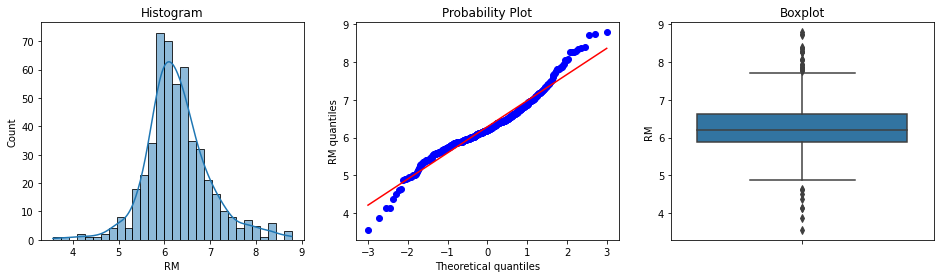

In [40]:
# empecemos con la variable RM del
# boston house dataset.
# RM es el número promedio de habitaciones por vivienda

diagnostic_plots(boston, 'RM')

Del histograma y la gráfica Q-Q, podemos ver que la variable RM tiene una distribución aproximadamente Gaussiana. En el gráfico de caja, vemos que hay algunos valores extremos que son los puntos que están por fuera de los brazos, en ambas colas de la distribución.


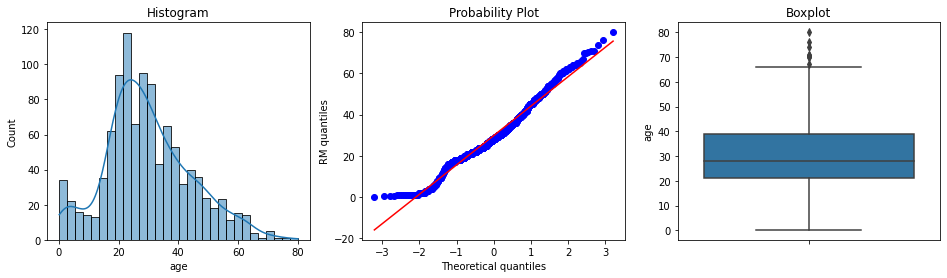

In [41]:
# Exploremos la variable age del titanic
# edad de los pasajeros a bordo del titanic

diagnostic_plots(titanic, 'age')

Del histograma y la gráfica Q-Q, podemos ver que la distribución de la variable se aproxima a la Gaussiana. Hay una desviación en los valores de menos de edad. En la gráfica de caja, podemos ver que la variable tiene algunos valores extremos por fuera de los brazos de la gráfica (a la derecha de la distribución - extremo superior del boxplot).

### Variables Sesgadas

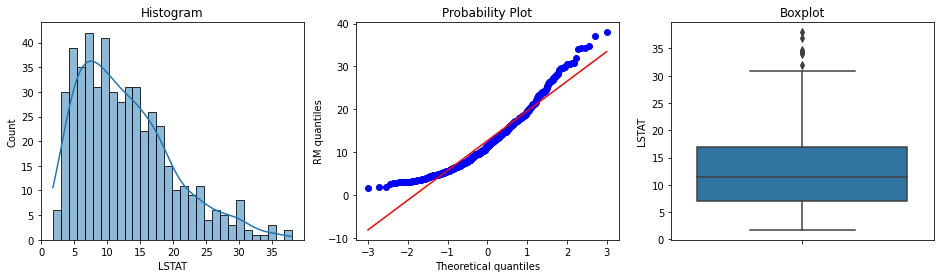

In [42]:
# variable LSTAT del boston house dataset

diagnostic_plots(boston, 'LSTAT')

LSTAT no está normalmente distribuida, de hecho vemos que está sesgada con una cola hacia la derecha. Según el gráfico de caja, hay algunos valores extremos en la cola derecha de la variable.


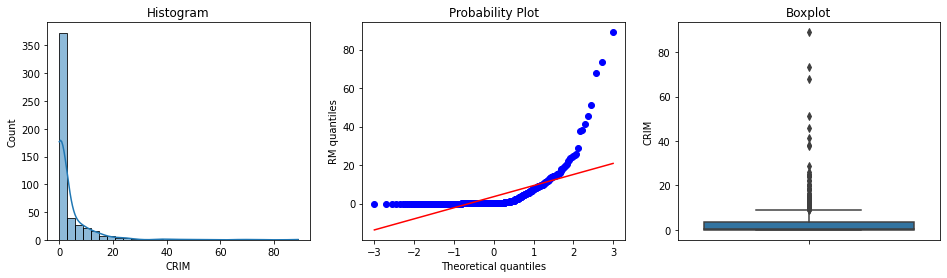

In [43]:
# variable CRIM del boston house dataset
# CRIM es la tasa de crimem per capita por ciudad

diagnostic_plots(boston, 'CRIM')

CRIM está altamente sesgada hacia la derecha. Parece que hay bastantes valores atípicos hacia el extremo derecho de la distribución (se observa del histograma y el gráfico de caja).

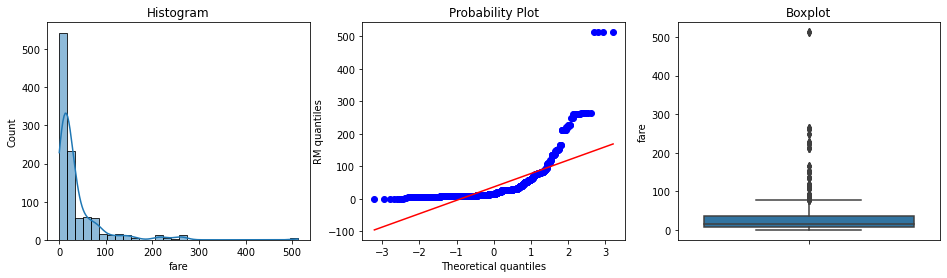

In [44]:
# variable Fare del titanic dataset
# Fare es el precio que pagó cada pasajero por su tiquete 

diagnostic_plots(titanic, 'fare')

La distribución de la variable Fare también está bastante sesgada y muestra valores inusuales a la derecha de la distribución.

En las próximas celdas, vamos a identificar los valores extremos usando la media y la desviación estándar de las variables RM y Age de los sets de datos de Boston y Titanic. Luego vamos a usar los rangos inter-cuantiles para identificar los valores extremos de las variables LSTAT y CRIM del set de datos Boston.

### Análisis de valores extremos para variables normalmente distribuidas

In [45]:
# función para encontrar los límites inferiores y superiores
# para variables normalmente distribuidas

def find_normal_boundaries(df, variable):

    # Calcular los límites para los valores extremos
    
    upper_boundary = df[variable].mean() + 3 * df[variable].std()
    lower_boundary = df[variable].mean() - 3 * df[variable].std()

    return upper_boundary, lower_boundary

In [46]:
# calcular los límites para RM 
upper_boundary, lower_boundary = find_normal_boundaries(boston, 'RM')
upper_boundary, lower_boundary

(8.392485817597757, 4.176782957105816)

Podemos concluir que los valores mayores a 8.4 o menores a 4.2 no son comunes para RM y por lo tanto se pueden considerar como outliers o valores atípicos.


In [47]:
# exploremos el número y el porcentage de los valores extremos para RM

print('Número total de casas: {}'.format(len(boston)))

print('Casas con mas de 8.4 habitaciones (extremo derecho de los valores atípicos): {}'.format(
    len(boston[boston['RM'] > upper_boundary])))

print('Casas con menos de 4.2 habitaciones (extremo izquierdo de los valores atípicos): {}'.format(
    len(boston[boston['RM'] < lower_boundary])))
print()
print('% extremo derecho de los valores atípicos: {}'.format(
    len(boston[boston['RM'] > upper_boundary]) / len(boston)))

print('% extremo izquierdo de los valores atípicoss: {}'.format(
    len(boston[boston['RM'] < lower_boundary]) / len(boston)))

Número total de casas: 506
Casas con mas de 8.4 habitaciones (extremo derecho de los valores atípicos): 4
Casas con menos de 4.2 habitaciones (extremo izquierdo de los valores atípicos): 4

% extremo derecho de los valores atípicos: 0.007905138339920948
% extremo izquierdo de los valores atípicoss: 0.007905138339920948


Usando el análisis de valores extremos podemos identificar los valores atípicos en ambos extremos de la distribución de RM; el porcentaje es pequeño (1.4% considerando ambos extremos).

Continuemos con la variable Age del titanic.

In [48]:
# calculemos los límites de Age en el titanic

upper_boundary, lower_boundary = find_normal_boundaries(titanic, 'age')
upper_boundary, lower_boundary

(73.01943709155127, -13.31576876619241)

El límite superior es 73 años: lo cual significa que los pasajeros mayores eran muy pocos. El límite inferior es negativo, y como edades negativas no existen, solo buscaremos valores extremos usando el límite superior.


In [49]:
# Número y porcentage de valores extremos

print('Pasajeros totales: {}'.format(len(titanic)))

print('Pasajeros mayores de  73 años: {}'.format(
    len(titanic[titanic['age'] > upper_boundary])))
print()
print('% Pasajeros mayores de  73 años: {}'.format(
    len(titanic[titanic['age'] > upper_boundary]) / len(titanic)))

Pasajeros totales: 1045
Pasajeros mayores de  73 años: 3

% Pasajeros mayores de  73 años: 0.0028708133971291866


Habían dos pasajeros mayores 73 años a bordo del Titanic, que pueden considerarse como valores atípicos, ya que la mayoría de la población era mucho mas joven.


### Análisis de valores extremos para las variables sesgadas. 


In [50]:
# función para encontrar los límites inferiores y superiores
# para variables sesgadas 


def find_skewed_boundaries(df, variable, distance):

    # Calcular los límites para los valores extremos

    # distance es un argumento de la función que da la opción de 
    # estimar 1.5 o 3 veces el IQR para calcular los límites

    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)

    lower_boundary = df[variable].quantile(0.25) - (IQR * distance)
    upper_boundary = df[variable].quantile(0.75) + (IQR * distance)

    return upper_boundary, lower_boundary

In [58]:
# determinemos los valores extremos
# usando la regla de proximidad entre-cuantiles: IQR * 1.5

# para LSTAT en el boston house dataset

upper_boundary, lower_boundary = find_skewed_boundaries(boston, 'LSTAT', 1.5)
upper_boundary, lower_boundary

(31.962500000000006, -8.057500000000005)

In [52]:
# miremos el número y porcentage de valores extremos 
# para LSTAT

# recordemos que LSTAT es el porcentage de estratos bajos de la población

print('total casas: {}'.format(len(boston)))

print('casas con LSTAT más de 32%: {}'.format(
    len(boston[boston['LSTAT'] > upper_boundary])))
print()
print('% casas con LSTAT mayor que 32%: {}'.format(
    len(boston[boston['LSTAT'] > upper_boundary])/len(boston)))

total casas: 506
casas con LSTAT más de 32%: 7

% casas con LSTAT mayor que 32%: 0.01383399209486166


El límite superior muestra un valor de ~32%. El límite inferior es negativo, LSTAT no tiene valores negativos. Asique usaremos solamente el límite superior.

Vemos que hay 7 casas, 1.3 % del conjunto total de datos, que tienen valores extremos para LSTAT


In [53]:
# Para los valores extremos, 
# usemos la regla de proximidad  
# entre-cuantiles multiplicando por 3: IQR * 3

upper_boundary, lower_boundary = find_skewed_boundaries(boston, 'CRIM', 3)
upper_boundary, lower_boundary

(14.462195000000001, -10.7030675)

In [54]:
# miremos el número y porcentage de valores extremos 
# para CRIM

print('número total de casas: {}'.format(len(boston)))

print('casas con CRIM mayor a 14 : {}'.format(
    len(boston[boston['CRIM'] > upper_boundary])))
print()
print('% casas con CRIM mayor a 14: {}'.format(
    len(boston[boston['CRIM'] > upper_boundary]) / len(boston)))

número total de casas: 506
casas con CRIM mayor a 14 : 30

% casas con CRIM mayor a 14: 0.05928853754940711


Cuando usamos 3 veces el rango entre-cuantil para encontrar los valores extremos, vemos que ~6% de las casas tienen una tasa alta de crimen. Para CRIM también el límite inferior es negativo, por lo tanto solo usaremos el límite superior.


** Es todo por este demo. Esperamos lo hayan disfrutado y nos vemos en el siguiente.**